In [64]:
import random
        
class Lecture(object):
    def __init__(self, listen, sleep, fb):
        self.listen = listen
        self.sleep = sleep
        self.fb = fb
    def get_listen_prob(self):
        return self.listen
    def get_sleep_prob(self):
        return self.sleep
    def get_fb_prob(self):
        return self.fb
     
def get_mean_and_std(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std
        
def lecture_activities(N, aLecture):
    '''
    N: integer, number of trials to run
    aLecture: Lecture object
 
    Runs a Monte Carlo simulation N times.
    Returns: a tuple, (float, float)
             Where the first float represents the mean number of lectures it takes 
             to have a lecture in which all 3 activities take place,
             And the second float represents the total width of the 95% confidence 
             interval around that mean.
    '''
    p = aLecture.get_listen_prob() * aLecture.get_sleep_prob() * aLecture.get_fb_prob()
    count_list = []
    for sim in range(N):
        count = 0
        for t in range(N):
            count += 1
            if p > random.uniform(0, 1):
                count_list.append(count)
                break
        count_list.append(count)
    mean, std = get_mean_and_std(count_list)
    return mean, (1.96 * 2 * std)
# sample test cases 
a = Lecture(1, 1, 1)
print(lecture_activities(100, a))
# the above test should print out (1.0, 0.0)
          
b = Lecture(1, 1, 0.5)
print(lecture_activities(100000, b))
# the above test should print out something reasonably close to (2.0, 5.516)

(1.0, 0.0)
(2.00078, 5.522443064712874)


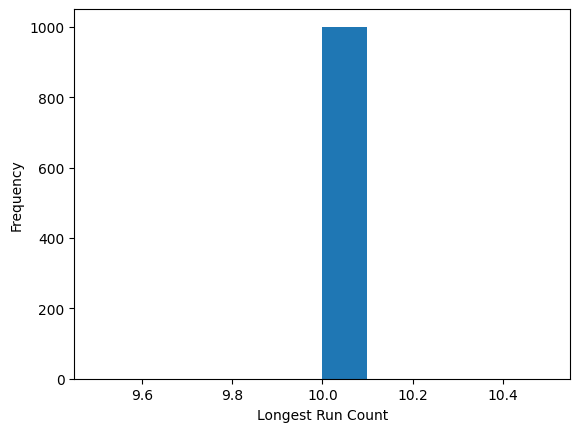

10.0

In [65]:
import random, pylab

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

# Implement this -- Coding Part 1 of 2
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a sequence of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axis
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    pylab.hist(values, numBins)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    if title != None:
        pylab.title(title)
    pylab.show()
    
                    
# Implement this -- Coding Part 2 of 2
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    longest_list = []
    for t in range(numTrials):
      roll_list = []
      for r in range(numRolls):
        roll_list.append(die.roll())
      running_r = roll_list[0]  # start with the first num
      max_running_count = 0
      current_running_count = 0
      for r in roll_list:
        if r == running_r:
          # print(f"{r} == {running_r} so current_running_count =", current_running_count)
          current_running_count += 1
        else:
          if current_running_count > max_running_count:
            max_running_count = current_running_count
          current_running_count = 1
          running_r = r
        if current_running_count > max_running_count:
          max_running_count = current_running_count
      longest_list.append(max_running_count)
    mean = round(sum(longest_list) / len(longest_list), 3)
    makeHistogram(longest_list, 10, "Longest Run Count", "Frequency")
    return mean
    
# # One test case
# print(getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000))

# My other test cases
getAverage(Die([1,1]), 10, 1000)

In [74]:
import numpy as np

def find_combination(choices, total):
    """
    choices: a non-empty list of ints
    total: a positive int
 
    Returns result, a numpy.array of length len(choices)
    such that
        * each element of result is 0 or 1
        * sum(result*choices) == total
        * sum(result) is as small as possible
    In case of ties, returns any result that works.
    If there is no result that gives the exact total, 
    pick the one that gives sum(result*choices) closest 
    to total without going over.
    """
    def generate_combinations(n, current=None, result=None):
        if current is None:
            current = []
        if result is None:
            result = []

        if len(current) == n:
            result.append(current)
        else:
            generate_combinations(n, current + [0], result)
            generate_combinations(n, current + [1], result)

        return result
    
    n = len(choices)
    combs = generate_combinations(n)
    results_dict = {}
    for subset in combs:
        if sum(np.array(subset) * np.array(choices)) == total:
            results_dict[tuple(subset)] = sum(subset)
    if len(results_dict) > 0:
        return np.array(min(results_dict, key=results_dict.get))
    else:
        diff_dict = {}
        for subset in combs:
            if sum(np.array(subset) * np.array(choices)) < total:
                diff_dict[tuple(subset)] = total - sum(np.array(subset) * np.array(choices))
        return np.array(min(diff_dict, key=diff_dict.get))

In [75]:
find_combination([3, 10, 2, 1, 5], 12)


array([0, 1, 1, 0, 0])

In [ ]:
def generate_combinations(n, current=None, result=None):
    if current is None:
        current = []
    if result is None:
        result = []

    if len(current) == n:
        result.append(current)
    else:
        generate_combinations(n, current + [0], result)
        generate_combinations(n, current + [1], result)

    return result

n = 3  # Length of the combinations
combinations = generate_combinations(n)
print(combinations)


[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
